# ⬇️ Importações e coleta de dados

###  Importando bibliotecas

Aqui é o local onde eu vou concentrar todas as importações ao longo dos desafios.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

import numpy as np
from numpy import random

# melhorar a visualização
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)

#Modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV

# métricas de avaliação
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# Reamostragem dos dados
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

# outras
import time
import pickle
import warnings
from scipy import interp
from pprint import pprint
from scipy.stats import norm
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# melhorar a visualização
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)

# mesagens de warning
warnings.filterwarnings("ignore")


### Importando o conjunto de dados

Observação: A coluna `Unnamed: 0` é criada pelo pandas quando nenhum cabeçalho é fornecido ou quando há uma coluna adicional de índice de linha sem nome no arquivo CSV. Para evitar que a coluna "Unnamed: 0" apareça ao ler um arquivo CSV com o pandas, você pode especificar qual coluna é o índice do DataFrame usando o parâmetro `index_col` da função `read_csv()`.

In [ ]:
dados_musicas = pd.read_csv('https://raw.githubusercontent.com/letpires/7DaysOfCodeSpotifyML/main/dataset.csv', index_col=0)
dados_musicas.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
#Verificando quantidade de linhas, colunas e tipos
dados_musicas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [ ]:
# Extraindo a descrição dos atributos numéricos
dados_musicas.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


# 🔎 Análise Exploratória dos Dados

A análise exploratória de dados é uma abordagem para analisar conjuntos de dados e resumir suas características principais, geralmente com métodos visuais. 

## Descrição dos dados

Vamos ver como os dados estão dispostos, checando suas dimensões e se há dados faltantes.

In [ ]:
# visualizando suas dimensões
dados_musicas.shape

(113550, 20)

In [ ]:
# visualizando a quantidade em cada linha e seu formato
dados_musicas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113550 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113550 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113550 non-null  int64  
 5   duration_ms       113550 non-null  int64  
 6   explicit          113550 non-null  bool   
 7   danceability      113550 non-null  float64
 8   energy            113550 non-null  float64
 9   key               113550 non-null  int64  
 10  loudness          113550 non-null  float64
 11  mode              113550 non-null  int64  
 12  speechiness       113550 non-null  float64
 13  acousticness      113550 non-null  float64
 14  instrumentalness  113550 non-null  float64
 15  liveness          113550 non-null  float64
 16  valence           11

Podemos observar que existem features númericas e categóricas. 

## Análises estatísticas

Vamos dar uma olhada inicial nas principais estatísticas descritivas. Uma análise descritiva é um primeiro passo importante para a realização de análises estatísticas, pois nos dá uma idéia da distribuição dos nossos dados e ajuda-nos a detectar outliers.

In [ ]:
# visualizando as estatísticas
dados_musicas.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
count,113550.000000,1.135500e+05,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000
mean,33.324139,2.280794e+05,0.567031,0.642090,5.309467,-8.243419,0.637860,0.084674,0.314067,0.155702,0.213611,0.474207,122.175888,3.904218,0.010559
std,22.283976,1.064148e+05,0.173408,0.251052,3.560134,5.011401,0.480621,0.105761,0.331907,0.309216,0.190461,0.259204,29.972861,0.432115,0.102215
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741802e+05,0.456000,0.473000,2.000000,-9.997750,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296500,4.000000,0.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000,0.000000
75%,50.000000,2.615878e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048675,0.273000,0.683000,140.073750,4.000000,0.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,1.000000


O dataset possui 113.550 entradas.

In [ ]:
# Artistas únicos e contagem de músicas por artista
print(dados_musicas['artists'].unique().shape)
print(dados_musicas['artists'].value_counts())

(31438,)
The Beatles                      279
George Jones                     260
Stevie Wonder                    235
Linkin Park                      224
Ella Fitzgerald                  221
                                ... 
Mr. Probz;Robin Schulz             1
Keanu Silva;Jhn McFly;Marissa      1
Alan Walker;Hans Zimmer            1
Triplo Max                         1
Jesus Culture                      1
Name: artists, Length: 31437, dtype: int64


## Verificando valores ausentes

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(dados_musicas.isnull().sum() / dados_musicas.shape[0]).sort_values(ascending=False)

album_name          0.000009
track_name          0.000009
artists             0.000009
track_id            0.000000
speechiness         0.000000
track_genre         0.000000
time_signature      0.000000
tempo               0.000000
valence             0.000000
liveness            0.000000
instrumentalness    0.000000
acousticness        0.000000
loudness            0.000000
mode                0.000000
key                 0.000000
energy              0.000000
danceability        0.000000
explicit            0.000000
duration_ms         0.000000
popularity          0.000000
pop_classe          0.000000
dtype: float64

In [ ]:
dados_musicas.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
pop_classe          0
dtype: int64

In [ ]:
#função que gera uma gráfico de barras com colunas e frequência dos dados faltantes.
def missing_visualization(df):
  quant_isnull = df.isnull().sum()
  columns = df.columns
  dic = {"colunas":[],"quant_isnull":[]}
  for coluna,quant in zip(columns,quant_isnull):
    if quant > 0:
      dic["colunas"].append(quant)
      dic["quant_isnull"].append(coluna)
  df = pd.DataFrame(dic)
  plt.figure(figsize=(15,5))
  sns.barplot(x=df["quant_isnull"],y=df["colunas"],data=df, palette="rocket")
  plt.xticks(rotation=45);

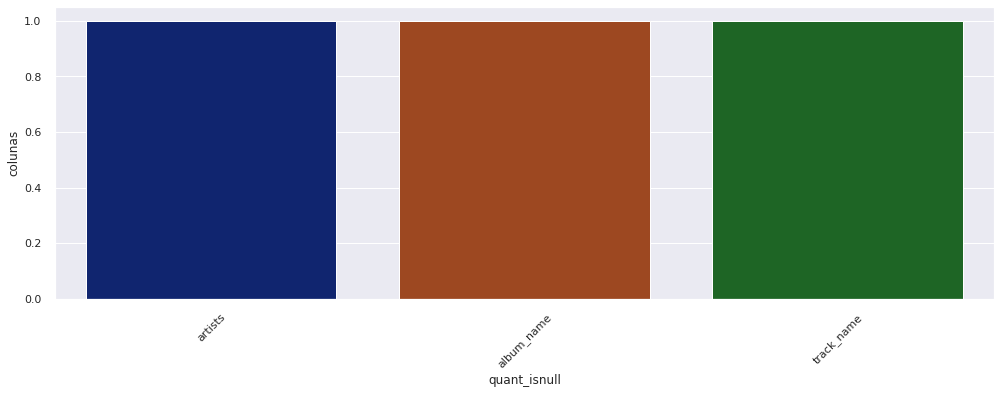

In [ ]:
missing_visualization(dados_musicas)

Podemos observar que temos valores ausentes no nosso dataset. Mais a frente precisaremos tratá-los.

## Respondendo algumas perguntas sobre nossos dados

In [ ]:
#As 100 músicas mais populares versus todo o conjunto de dados

sorted_df = dados_musicas.sort_values('popularity', ascending = False).head(100)
sorted_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,pop_classe
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,...,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance,1
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,...,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop,1
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,...,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop,1
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,...,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,dance,1
30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,...,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm,1


In [ ]:
dados_musicas.isna().sum() #check for null values

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
pop_classe          0
dtype: int64

In [ ]:
dados_musicas.isna().sum() #check for null values

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
pop_classe          0
dtype: int64

In [ ]:
dados_musicas.shape

(113549, 21)

In [ ]:
dados_musicas.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'pop_classe'],
      dtype='object')

In [ ]:
dados_musicas.duration_ms

0         230666
1         149610
2         210826
3         201933
4         198853
           ...  
113995    384999
113996    385000
113997    271466
113998    283893
113999    241826
Name: duration_ms, Length: 113549, dtype: int64

In [ ]:
# dados_musicas["duration_ms"]= dados_musicas["duration_ms"].replace("durations_ms", )
# dados_musicas

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,pop_classe
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,0
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,0
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,0
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,0


In [ ]:
#Top 5 artistas populares

popular_artists = dados_musicas.groupby("artists").count().sort_values(by='popularity', ascending=False)['popularity'][:5]
popular_artists

artists
The Beatles        279
George Jones       260
Stevie Wonder      235
Linkin Park        224
Ella Fitzgerald    221
Name: popularity, dtype: int64

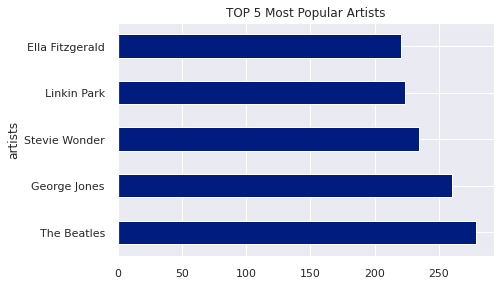

In [ ]:
popular_artists.plot.barh(color="hotpink") ##visualize the data
plt.title("TOP 5 Most Popular Artists")
plt.show()

In [ ]:
#top 5 longest songs or tracks¶

long_songs = dados_musicas[["track_name", "duration_ms"]].sort_values(by="duration_ms", ascending=False)[:5]
long_songs

,track_name,duration_ms
73617,Unity (Voyage Mix) Pt. 1,5237295
10935,Crossing Wires 002 - Continuous DJ Mix,4789026
24348,The Lab 03 - Continuous DJ Mix Part 1,4730302
73840,Amnesia Ibiza Underground 10 DJ Mix,4563897
13344,House of Om - Mark Farina - Continuous Mix,4447520


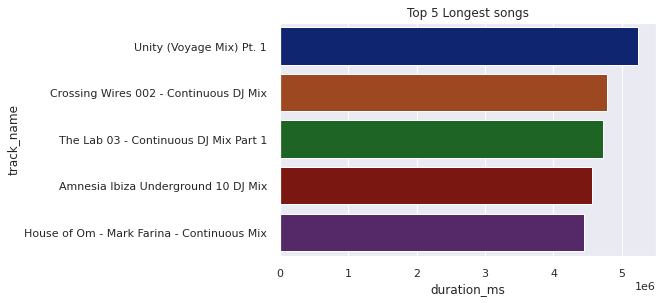

In [ ]:
sns.barplot(x="duration_ms", y="track_name", data= long_songs, color = 'hotpink')
plt.title("Top 5 Longest songs")
plt.show()

In [ ]:
#Top 5 most trending genre

trend_genre = dados_musicas[["track_genre", "popularity"]].sort_values(by="popularity", ascending=False)[:5]
trend_genre

,track_genre,popularity
81051,pop,100
20001,dance,100
51664,hip-hop,99
68303,latino,98
81210,pop,98


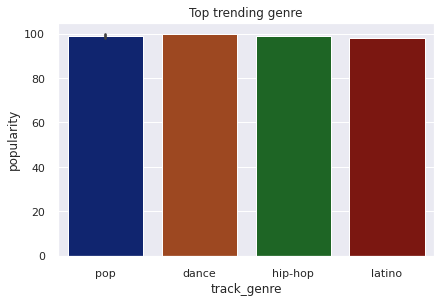

In [ ]:
sns.barplot(x="track_genre",y="popularity", data=trend_genre, color = 'hotpink')
plt.title("Top trending genre")
plt.show()

In [ ]:
#Top 5 most danceable songs

danceable = dados_musicas[["track_name", "artists", "danceability"]].sort_values(by="danceability", ascending=False)[:5]
danceable

,track_name,artists,danceability
111635,Sol Clap,Quantic,0.985
66576,Medicaid Baby,That Girl Lay Lay,0.984
24916,Inspiration,Delano Smith,0.983
73374,Daily Routines,Oliver Schories,0.982
66793,"Featuring Mixx Master Lee, Red Rum & J. Smoov ...",Mixx Master Lee,0.981


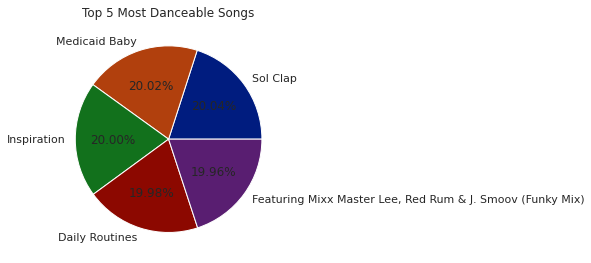

In [ ]:
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffb6c1']

plt.pie(x="danceability", data=danceable, autopct='%1.2f%%', labels=danceable.track_name, colors = colors)
plt.title("Top 5 Most Danceable Songs")
plt.show()

In [ ]:
#Encontrando correlação entre as variáveis

dados_musicas.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,33.324433,2.280814e+05,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218,0.010559
std,22.283855,1.064131e+05,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117,0.102215
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741840e+05,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000,0.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000,0.000000
75%,50.000000,2.615880e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000,0.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,1.000000


In [ ]:
corr_table = dados_musicas.corr(method="pearson") #get variables the correlation

In [ ]:
corr_table

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
popularity,1.000000,-0.007928,0.043938,0.034407,-0.002447,-0.004167,0.047368,-0.015009,-0.045463,-0.022356,-0.094718,-0.005668,-0.041097,0.012187,0.030567,0.233373
duration_ms,-0.007928,1.000000,-0.066005,-0.074117,0.058160,0.008519,-0.004233,-0.035961,-0.063194,-0.103676,0.125301,0.010199,-0.154795,0.024312,0.018351,-0.015055
explicit,0.043938,-0.066005,1.000000,0.122179,0.096256,0.004843,0.107988,-0.037387,0.307455,-0.093748,-0.103169,0.032367,-0.003779,-0.003097,0.038234,0.057712
danceability,0.034407,-0.074117,0.122179,1.000000,0.131694,0.036546,0.256559,-0.069783,0.108236,-0.169181,-0.183974,-0.131651,0.476755,-0.051517,0.207370,0.048418
energy,-0.002447,0.058160,0.096256,0.131694,1.000000,0.048047,0.760624,-0.079331,0.141976,-0.732747,-0.179967,0.184810,0.258451,0.247361,0.186671,0.016445
key,-0.004167,0.008519,0.004843,0.036546,0.048047,1.000000,0.038359,-0.135871,0.020820,-0.041124,-0.006819,-0.001518,0.034233,0.010903,0.015122,0.006461
loudness,0.047368,-0.004233,0.107988,0.256559,0.760624,0.038359,1.000000,-0.042074,0.060088,-0.588111,-0.432109,0.076792,0.279428,0.212181,0.191648,0.043144
mode,-0.015009,-0.035961,-0.037387,-0.069783,-0.079331,-0.135871,-0.042074,1.000000,-0.046773,0.096548,-0.050787,0.013900,0.021411,0.000371,-0.024365,-0.008569
speechiness,-0.045463,-0.063194,0.307455,0.108236,0.141976,0.020820,0.060088,-0.046773,1.000000,-0.001378,-0.089214,0.205092,0.036393,0.017167,-0.000397,-0.003495
acousticness,-0.022356,-0.103676,-0.093748,-0.169181,-0.732747,-0.041124,-0.588111,0.096548,-0.001378,1.000000,0.102134,-0.020313,-0.106240,-0.207620,-0.175621,-0.039174


Verificar a correlação de dados na análise exploratória é importante porque ajuda a entender a relação entre as variáveis em um conjunto de dados. A correlação é uma medida estatística que indica a força e a direção da relação entre duas variáveis.

Ao examinar a correlação, podemos determinar se as variáveis estão positivamente correlacionadas (ou seja, quando uma aumenta, a outra também aumenta), negativamente correlacionadas (quando uma aumenta, a outra diminui) ou não correlacionadas (quando não há relação aparente entre as variáveis).

Além disso, a correlação também ajuda a identificar possíveis problemas com o conjunto de dados, como a presença de outliers ou variáveis altamente correlacionadas, o que pode afetar a precisão dos modelos de análise de dados.

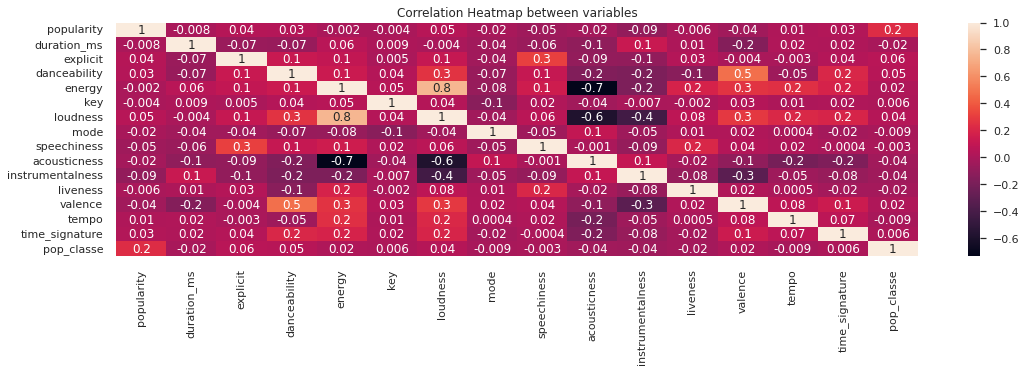

In [ ]:
###plotting the correlation table using seaborn
plt.figure(figsize=(16,4))
sns.heatmap(corr_table, annot=True, fmt=".1g")
plt.title("Correlation Heatmap between variables")
plt.show() #display the plot

Podemos ver que a feature `loudness` e `energia` possuem uma alta correlação. Ou seja, quando uma aumenta, a outra também aumenta.

# 🛠️ Pré-Processamento dos Dados

Esse é o momento em que começamos a preparar nosso conjunto de dados para nosso modelo de machine learning!

In [ ]:
#Removendo itens duplicados

dados_musicas = dados_musicas.drop_duplicates()
dados_musicas.head()

In [ ]:
# Criando classes de popularidade
dados_musicas[dados_musicas["popularity"] >=80]

conditionlist = [
    (dados_musicas['popularity'] >= 80) ,
    (dados_musicas['popularity'] <80)]

choicelist = [1,0]
dados_musicas['pop_classe'] = np.select(conditionlist, choicelist, default='Not Specified')
dados_musicas['pop_classe'] = dados_musicas['pop_classe'].astype(int)

In [ ]:
dados_musicas = dados_musicas.dropna() #removendo valores nulos

In [ ]:
dados_musicas.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'pop_classe'],
      dtype='object')

In [ ]:
dados_musicas = dados_musicas.drop(columns=['popularity'])

In [ ]:
dados_musicas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   duration_ms       113549 non-null  int64  
 5   explicit          113549 non-null  bool   
 6   danceability      113549 non-null  float64
 7   energy            113549 non-null  float64
 8   key               113549 non-null  int64  
 9   loudness          113549 non-null  float64
 10  mode              113549 non-null  int64  
 11  speechiness       113549 non-null  float64
 12  acousticness      113549 non-null  float64
 13  instrumentalness  113549 non-null  float64
 14  liveness          113549 non-null  float64
 15  valence           113549 non-null  float64
 16  tempo             11

In [ ]:
#Mantendo somente colunas quantitativas e que são importantes para o modelo

df_quantitative = dados_musicas
cols_to_drop = []
for column in dados_musicas:
    if dados_musicas[column].dtype == 'object':
        cols_to_drop.append(column)
df_quantitative = dados_musicas.drop(columns=cols_to_drop)

print(f"Tamanho do dataset que vamos trabalhar: {df_quantitative.shape}")

Working dataset shape: (113549, 15)


In [ ]:
df_quantitative.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
0,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,0
113996,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,0
113997,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,0
113998,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,0


In [ ]:
df_quantitative = df_quantitative.drop(columns=['explicit'])
df_quantitative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113549 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       113549 non-null  int64  
 1   danceability      113549 non-null  float64
 2   energy            113549 non-null  float64
 3   key               113549 non-null  int64  
 4   loudness          113549 non-null  float64
 5   mode              113549 non-null  int64  
 6   speechiness       113549 non-null  float64
 7   acousticness      113549 non-null  float64
 8   instrumentalness  113549 non-null  float64
 9   liveness          113549 non-null  float64
 10  valence           113549 non-null  float64
 11  tempo             113549 non-null  float64
 12  time_signature    113549 non-null  int64  
 13  pop_classe        113549 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 13.0 MB


In [ ]:
df_quantitative.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,384999,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,0
113996,385000,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,0
113997,271466,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,0
113998,283893,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,0


In [ ]:
# Normalizando os dados, deixando na mesma escala
df_quantitative_nm=(df_quantitative-df_quantitative.min())/(df_quantitative.max()-df_quantitative.min())


In [ ]:
df_quantitative_nm.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
0,0.042473,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,0.8,0.0
1,0.026971,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,0.8,0.0
2,0.038679,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.8,0.0
3,0.036978,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,0.6,0.0
4,0.036389,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,0.071990,0.174619,0.2350,0.454545,0.612952,1.0,0.043731,0.642570,0.928000,0.0863,0.034070,0.517705,1.0,0.0
113996,0.071990,0.176650,0.1170,0.000000,0.577345,0.0,0.041554,0.997992,0.976000,0.1050,0.035176,0.350242,0.8,0.0
113997,0.050276,0.638579,0.3290,0.000000,0.714648,0.0,0.043523,0.870482,0.000000,0.0839,0.746734,0.543933,0.8,0.0
113998,0.052653,0.595939,0.5060,0.636364,0.714759,1.0,0.030777,0.382530,0.000000,0.2700,0.415075,0.558651,0.8,0.0


# ➗ Dividindo o dataset (treino, validação e teste)

Para divisão do dataset, separou-se em treino e teste, sendo que o teste será dividido com 20% de todo o conjunto e será usado somente após o modelo ser escolhido e ajustado.

Já os dados de treino, serão separados em treino e validação. Sendo os dados de validação usados para comparação de diferentes modelos e hiperparâmetros.

Embora os modelos sejam testados e otimizados, é díficil prever se perfomará bem em produção, por isso, o acompanhamento inicial é importante para verificar se realmente funciona ou precisa de ajustes.

**Dados de treinamento:** usado para treinar o modelo.

**Dados de validação:** usado para comparação de diferentes modelos e hiperparâmetros.

**Dados de teste:** usado para comprovar que aquele modelo realmente funciona. São dados ignorados no treinamento e no processo de escolha de hiperparâmetros.

In [ ]:
# Separando os dados para treino e teste
df_train, df_test = train_test_split(df_quantitative_nm, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# visualizando as proporções da variável alvo
df_train.pop_classe.value_counts(normalize=True)

0.0    0.98941
1.0    0.01059
Name: pop_classe, dtype: float64

In [ ]:
# visualizando as proporções da variável alvo
df_test.pop_classe.value_counts(normalize=True)

0.0    0.989564
1.0    0.010436
Name: pop_classe, dtype: float64

In [ ]:
# dividindo X e y
X = df_train.drop('pop_classe', axis=1)
y = df_train.pop_classe

# separando os dados mantendo a porcentagem de amostras em cada classe
StratifKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# looping para separar os dados em treino e validação
for train_index, val_index in StratifKfold.split(X, y):

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [ ]:
# checando as proporções da classe 1 na divisão
print(f'Dimensões: {X_train.shape, X_val.shape, y_train.shape, y_val.shape}\n')
print(f"Proporção do df_train para classe=1: {round(len(df_train[df_train.pop_classe==1]) / df_train.shape[0], 4)}\n")
print(f"Proporção de X_train para classe=1:  {round(len(y_train[y_train==1]) / X_train.shape[0], 4)}")
print(f"Proporção de X_val para classe=1:    {round(len(y_val[y_val==1]) / X_val.shape[0], 4)}")

Os dois conjuntos estão com a mesma proporção na variável resposta. A partir de agora vamos trabalhar somente com o conjunto de dados de treino e o teste somente para validação final.

Então vamos separar o conjunto de dados de treino, em treino e validação.

#🧵 Definindo o baseline
> *Uma linha de base (baseline) é o resultado de um modelo/solução muito básico. Você geralmente cria uma linha de base e depois tenta fazer soluções mais complexas para obter um resultado melhor. Se você conseguir uma pontuação melhor do que a linha de base, é bom.*

Comecei dividindo os dados em treino e validação (X - variáveis preditoras, y - variável de objetivo) e após utilizei o `StratifiedKFold` que separa os dados para uma validação cruzada preservando o percentual de amostras em cada classe.

In [ ]:
# Instanciando o modelo
logReg = LogisticRegression()

# Treinando o modelo
logReg.fit(X_train, y_train)

# Prevendo nos dados de treino
y_pred_base_train = logReg.predict(X_train)

# Prevendo nos dados de validação
y_pred_base_val = logReg.predict(X_val)

Nos dados de TREINO:
------------------------------------------------------------
Modelo:    Regressão Logística (baseline)

accuracy:  0.9894044473800088
precision: 0.0
recall:    0.0
f1:        0.0

------------------------------------------------------------
------------------------------------------------------------

Nos dados de VALIDAÇÃO:
------------------------------------------------------------
Modelo:    Regressão Logística (baseline)

accuracy:  0.9894313865800628
precision: 0.0
recall:    0.0
f1:        0.0
------------------------------------------------------------


In [ ]:
logReg.coef_.tolist()[0]

In [ ]:
df_coef = df_quantitative_nm.drop(columns='pop_classe')
df_coef.columns

In [ ]:
data = {
    "Features": df_coef.columns,
    "Coef": logReg.coef_.tolist()[0]
}

df = pd.DataFrame(data)
df

## Validando o baseline

In [ ]:
print('Nos dados de TREINO:')

print('---' * 20)
print('Modelo:    Regressão Logística (baseline)\n')
print(f"accuracy:  {accuracy_score(y_train, y_pred_base_train)}")
print(f"precision: {precision_score(y_train, y_pred_base_train)}")
print(f"recall:    {recall_score(y_train, y_pred_base_train)}")
print(f"f1:        {f1_score(y_train, y_pred_base_train)}")
print()
print('---' * 20)
print('---' * 20)
print()
print('Nos dados de VALIDAÇÃO:')
print('---' * 20)
print('Modelo:    Regressão Logística (baseline)\n')
print(f"accuracy:  {accuracy_score(y_val, y_pred_base_val)}")
print(f"precision: {precision_score(y_val, y_pred_base_val)}")
print(f"recall:    {recall_score(y_val, y_pred_base_val)}")
print(f"f1:        {f1_score(y_val, y_pred_base_val)}")
print('---' * 20)

# 📈 Reamostragem, teste e validação


In [ ]:
# Dicionário dos classificadores
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(), 
    "Random Forest": RandomForestClassifier()
}

## Distribuição (Random UnderSampling)

Para esta subamostragem vamos utilizar um dos métodos da família Near-miss, da biblioteca imblearn que consiste selecionar amostras baseados na distância da classe majoritária com as amostras da classe minoritária, basicamente utilizando o modelo de KNN em seu framework.

Há 3 versões desse método: NearMiss1, NearMiss2 e NearMiss3. Para este teste será utilizada a versão 1, que é padrão quando não passamos nenhum parâmetro.

In [ ]:
# instanciando o método
undersample = NearMiss()

# transformando o conjunto de dados
X_under, y_under = undersample.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_under)
print(counter)

Counter({0.0: 770, 1.0: 770})


In [ ]:
for nome, model in classifiers.items():
    
    model.fit(X_under, y_under)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.2174822480321462
precision: 0.008343850792315243
recall:    0.6197916666666666
f1:        0.016466030164660302
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.18395992734078273
precision: 0.009387782471669014
recall:    0.7291666666666666
f1:        0.018536908308507117
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.19150107337480046
precision: 0.01139274639342052
recall:    0.8802083333333334
f1:        0.02249434313855983
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.03225628887543348
precision: 0.010472383311750464
recall:    0.96875
f1:        0.02072077090179914
-----------------------------------

## Distribuição (Random Over-Sampling)

Este método consiste em adicionar um conjunto aleatório de cópias de amostras da classe minoritária aos dados, podendo aumentar a probabilidade de sobreajuste, porém, isso também pode resultar em um aumento no custo computacional ao ajustar o modelo, especialmente por considerar que o modelo estará vendo as mesmas amostras no conjunto de treinamento novamente.

In [ ]:
# instanciando o método
oversample = RandomOverSampler(sampling_strategy='minority')

# transformando o conjunto de dados
X_over, y_over = oversample.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_over)
print(counter)

Counter({0.0: 71902, 1.0: 71902})


In [ ]:
for nome, model in classifiers.items():
    
    model.fit(X_over, y_over)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.6153465074035339
precision: 0.02005649717514124
recall:    0.7395833333333334
f1:        0.03905390539053905
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.9791930423294986
precision: 0.2753623188405797
recall:    0.59375
f1:        0.37623762376237624
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.9835415863929102
precision: 0.3467048710601719
recall:    0.6302083333333334
f1:        0.4473197781885397
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.988220399625695
precision: 0.4576923076923077
recall:    0.6197916666666666
f1:        0.5265486725663716
-------------------------------------------------

## SMOTE (Over-Sampling)

O SMOTE Syntetic Minority Oversampling Technique consiste em selecionar uma amostra aleatório da classe minoritária escolhido primeiro, então, k vizinhos mais próximos dessa amostra, dai um vizinho também é selecionado aleatoriamente e uma amostra sintética é criado nesse espaço entre essas duas.

In [ ]:
# instanciando o método
oversample_smote = SMOTE(sampling_strategy='minority')

# transformando o conjunto de dados
X_smote, y_smote = oversample_smote.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_smote)
print(counter)

Counter({0.0: 71902, 1.0: 71902})


In [ ]:
for nome, model in classifiers.items():
    
    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.6329058182418671
precision: 0.020719254106852155
recall:    0.7291666666666666
f1:        0.04029356741977263
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.9439092860681455
precision: 0.11100658513640639
recall:    0.6145833333333334
f1:        0.18804780876494023
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.9657070512467661
precision: 0.17496229260935142
recall:    0.6041666666666666
f1:        0.27134502923976606
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.9884405790719436
precision: 0.4628099173553719
recall:    0.5833333333333334
f1:        0.5161290322580646
---------------------------------

## Híbrido: Oversampling e Undersampling

Agora, combinando a técnica de sobreamostragem ao conjunto de dados e, em seguida, aplica a subamostragem à saída da transformação da sobreamostragem, antes de retornar o resultado final.

In [ ]:
# transformando o conjunto de dados
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

# instanciando um pipeline com os dois métodos
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# transformando o conjunto de dados
X_under_over, y_under_over = pipeline.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_under_over)
print(counter)

Counter({0.0: 14380, 1.0: 7190})


In [ ]:
for nome, model in classifiers.items():
    
    model.fit(X_under_over, y_under_over)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.871910607144823
precision: 0.027445772465692783
recall:    0.3229166666666667
f1:        0.05059159526723785
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.9165519898717455
precision: 0.08521303258145363
recall:    0.7083333333333334
f1:        0.15212527964205816
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.9565696042274454
precision: 0.1467455621301775
recall:    0.6458333333333334
f1:        0.2391513982642237
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.9872295921175758
precision: 0.42857142857142855
recall:    0.625
f1:        0.5084745762711864
------------------------------------------------

# 💥 Avaliação dos modelos

Após testar vários modelos, selecionei o que performou um pouco melhorno geral, **Random Forest**. O método de balanceamento escolhido foi o **Random Over-Sampling**. 

## Ajustando (tunning) o modelo selecionado

Vamos definir os hiperparâmetros para analisar a melhor performance com a validação cruzada, mas antes vamos colocar os dados no formato para o algoritmo receber.

Não foram definidos um range alto de hiperparâmetros por causa da quantidade de dados que além de exigir muito poder computacional o tempo também será elevado, mesmo com o `RandomizedSearchCV` ao invés do `**GridSearchCV**`.

A validação cruzada ou cross-validation é uma técnica no qual o avaliamos se o modelo generaliza, ou seja, se o modelo tem uma boa performance com diferentes amostras, sem overfitting.

## Definindo hiperparâmetros

In [ ]:
# transformando os dados
X_train_array = X_train.values
X_val_array = X_val.values
y_train_array = y_train.values
y_val_array = y_val.values

In [ ]:
#HIPERPARÂMETROS PARA RANDOM FOREST

# número de árvores
n_estimators = [3,5,10,100]

# número de features para considerar em cada split
max_features = [3,4,5,6,None]

# número máximo de níveis da árvore
max_depth = [3,4,5,6,None]

# pesos para cada classe
class_weight = ['balanced',None]

# colocando os parametros definidos em um dicionário
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'class_weight': class_weight}

# exibindo os parâmetros
pprint(random_grid)

{'class_weight': ['balanced', None],
 'max_depth': [3, 4, 5, 6, None],
 'max_features': [3, 4, 5, 6, None],
 'n_estimators': [3, 5, 10, 100]}


## Random Forest + Distribuição (Random Over-Sampling)

In [ ]:
# definindo listas vazias para receber os resultados da validação cruzada
accuracy_lst_rf = []
precision_lst_rf = []
recall_lst_rf = []
f1_lst_rf = []
auc_lst_rf = []


# instanciando o RandomizedSearchCV para validação cruzada com o grid de parametros
rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, random_state=42)

# iniciando o tempo e contador para o loop
start = time.time()
count = 0

# looping para a validação cruzada
for train, test in StratifKfold.split(X_train_array, y_train_array):
    
    # instanciando o pipeline com técnica de reamostragem
    pipeline_rf = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), rf_grid)
    
    # executando o pipeline para treinar o modelo
    model_rf = pipeline_rf.fit(X_train_array[train], y_train_array[train])
    
    # identificando os melhores parâmetros no treinamento
    best_est_rf = rf_grid.best_estimator_
    
    # realizando as previsões com o resultado do treinamento
    prediction_rf = best_est_rf.predict(X_train_array[test])
    
    # armazenando os resultados
    accuracy_lst_rf.append(pipeline_rf.score(X_train_array[test], y_train_array[test]))
    precision_lst_rf.append(precision_score(y_train_array[test], prediction_rf))
    recall_lst_rf.append(recall_score(y_train_array[test], prediction_rf))
    f1_lst_rf.append(f1_score(y_train_array[test], prediction_rf))
    auc_lst_rf.append(roc_auc_score(y_train_array[test], prediction_rf))
    
    # identificando em qual loop está
    count = count + 1
    print(f"kfold nº: {count}")
    
    # medindo o tempo de cada loop
    intervalo = time.time()
    print(f"tempo intermediário: {(intervalo - start)/60:.1f} minutos")
    print()

print('---' * 20)
print(f"melhores estimadores para RF: {rf_grid.best_params_}")

# imprimindo a média dos resultados da validação cruzada
print('---' * 20)
print('Resultados')
print(f"accuracy:  {np.mean(accuracy_lst_rf)}")
print(f"precision: {np.mean(precision_lst_rf)}")
print(f"recall:    {np.mean(recall_lst_rf)}")
print(f"f1:        {np.mean(f1_lst_rf)}")
print(f"AUC:       {np.mean(auc_lst_rf)}")
print('---' * 20)

# imprimindo o tempo total da validação cruzada
end = time.time()
print(f"Tempo do loop para validação cruzada: {(end - start)/60:.1f} minutos")

kfold nº: 1
tempo intermediário: 5.7 minutos

kfold nº: 2
tempo intermediário: 11.4 minutos

kfold nº: 3
tempo intermediário: 17.2 minutos

kfold nº: 4
tempo intermediário: 22.9 minutos

kfold nº: 5
tempo intermediário: 28.6 minutos

------------------------------------------------------------
melhores estimadores para RF: {'n_estimators': 100, 'max_features': 6, 'max_depth': None, 'class_weight': 'balanced'}
------------------------------------------------------------
Resultados
accuracy:  0.9877394344158856
precision: 0.43665188351526296
recall:    0.5415584415584416
f1:        0.48319577340396086
AUC:       0.7670380168901069
------------------------------------------------------------
Tempo do loop para validação cruzada: 28.6 minutos


# 📈 Avaliação do modelo ajustado

## Análise das principais métricas de classificação


**Random Forest com OverSampling**

* **accuracy:**  0.9877394344158856
* **precision:** 0.43665188351526296
* **recall:**   0.5415584415584416
* **f1:**        0.48319577340396086
* **AUC:**       0.7670380168901069


Random Forest apresentou métricas melhores em relação ao baseline estabelecido no início, por isso vou prosseguir com ele.


## Curva ROC-AUC

A Receiver Operating Characteristic Curve (ROC curve) ou Curva Característica de Operação do Receptor, é uma representação gráfica que ilustra o desempenho (ou performance) de um sistema classificador binário à medida que o seu limite de discriminação varia. A curva ROC é também conhecida como curva de característica de operação relativa, porque o seu critério de mudança é resultado da operação de duas características (TP e FP).

O **Curva ROC** possui dois parâmetros:

* Taxa de verdadeiro positivo (True Positive Rate ou TPR), que é dado por TP/(TP + FN)
* Taxa de falso positivo (False Positive Rate ou FPR), que é dado por FP / (FP + TN)
Quanto mais superior à esquerda o valor melhor é, e vamos criar uma função para fazermos uma validação cruzada plotando o resultado de cada um dos splits e por fim a média do resultado.

AUC fornece uma medida agregada de desempenho em todos os limites de classificação possíveis, ou seja, como a probabilidade de que o modelo classifica um exemplo positivo aleatório mais alto do que um exemplo negativo aleatório.

In [ ]:
# criando uma função para plotar o gráfico
def draw_cv_roc_curve(classifier, cv, X, y, title='ROC Curve'):
    # definindo algumas listas vazias para receber o resultado
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    # definindo o contador
    i = 0
    
    # loop ara validação cruzada
    for train, test in cv.split(X, y):
        
        # executando a função e armazenando as probabilidade dos resultados
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        
        # computando a curva ROC e AUC
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        # plotando a curva ROC da validação cruzada em individualmente
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    
    # plotando a linha diagonal como referência da taxa de 50/50
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # calculando as médias e desvio padrão
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # plotando curva ROC com a média dos resultados
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # customizando o gráfico
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(title)
    plt.legend(loc="lower right")
    
    # exibindo o gráfico
    plt.show()
    
# executando função e plotando a Curva ROC AUC
draw_cv_roc_curve(best_est_rf, StratifKfold, X_train, y_train, title='ROC Curve')

#📊 Modelo Final

Após validarmos nosso modelo, utilizaremos todos os dados de X e y, do dataset de treinamento, para o modelo final com os melhores hiperparâmetros encontrados na validação, definir o pipeline e treinar o modelo.

## Treinamento do modelo
Treinaremos o modelo com os melhores hiperparâmetros encontrados, executaremos o pipeline com o Oversampling e Random Forest ajustada e por fim, o modelo será treinado.

In [ ]:
# separando novamente os dados
X_all = df_train.drop('pop_classe', axis=1)
y_all = df_train.pop_classe

# instanciando o modelo final com os parametros encontrados na validação cruzada
final_model = rf_grid.best_estimator_

# definindo o pipeline para reamostragem oversampling e o modelo final
pipeline = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), final_model)

# treinando o modelo com os parametros ajustados com todos os dados
model = pipeline.fit(X_all, y_all)

In [ ]:
model.steps[1]


In [ ]:
lista = model.steps[1][1].feature_importances_

In [ ]:
print(lista.tolist())

In [ ]:
# lista de nomes
nomes = df_quantitative_nm.columns

plt.barh(df_quantitative_nm.drop(columns=['pop_classe']).columns.tolist(), lista.tolist())

plt.show()